In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('ggplot')
%matplotlib inline

In [3]:
def millions(x,pos):
    #The two args are the value and tick position
    return '%1.fK' %(x*1e-3)
def percent(x,pos):
    #The two args are the value and tick position
    return '%.1f%%' %(x*100)
def normalize(x):
    return (x - x.mean())/(x.std())

format_p = FuncFormatter(percent)
format_m = FuncFormatter(millions)


In [4]:
df_sessions_g = pd.read_csv('sessions_3brands.csv',sep=';',decimal=',')
df_pviews_daily = pd.read_csv('pageviews_3brands.csv',sep=';',decimal=',')
df_sessions = df_sessions_g.groupby(['CalendarYearWeek','BrandCode','CountryCode']).sum().reset_index()
df_pviews = df_pviews_daily.groupby(['CalendarYearWeek','BrandCode','CountryCode']).sum().reset_index()
df_sessions.rename(columns=lambda x: x.lower(),inplace=True)
df_pviews.rename(columns=lambda x: x.lower(),inplace=True)

In [5]:
df_merged = df_sessions.merge(df_pviews, how='left',on=['calendaryearweek','brandcode','countrycode'])
df_merged['sessions_cvr%'] = df_merged.transactions/df_merged.sessions
df_merged['pdp/sess'] = df_merged.pdp/df_merged.sessions
df_merged['plp/sess'] = df_merged.plp/df_merged.sessions
df_merged['pdp/plp'] = df_merged.pdp/df_merged.plp
df_merged['pdp_cvr%'] = df_merged.gis_od/df_merged.pdp
df_merged['plp_cvr%'] = df_merged.gis_od/df_merged.plp
df_merged['gis/sess'] = df_merged.gis_od/df_merged.sessions
df_merged = df_merged.groupby(['calendaryearweek','brandcode']).sum().unstack('brandcode')
df_merged.drop(['2017-W18','2018-W18'],axis=0,inplace=True)
df_merged.head()

sessions                 transactions                 pdp  \
brandcode              JJ      ON      VM           JJ    ON    VM      JJ   
calendaryearweek                                                             
2017-W19            82378  194239  141616         3572  7558  3076  307887   
2017-W20            89708  206186  144492         4273  7791  3563  350682   
2017-W21            84469  199991  162395         3741  6826  3359  323207   
2017-W22            91433  207069  153686         4120  7196  3347  358528   
2017-W23            80214  199510  133584         3499  6692  2963  294255   

                                       plp    ...      pdp/plp  pdp_cvr%  \
brandcode              ON      VM       JJ    ...           VM        JJ   
calendaryearweek                              ...                          
2017-W19          1006776  570914  4178042    ...     0.053165  0.046663   
2017-W20          1062299  653104  4426394    ...     0.053734  0.052846   
2017-W21          1002909  666384  4141096    ...     0.054464  0.051193   
2017-W22          1025835  650744  4375946    ...     0.053573  0.051257   
2017-W23           937387  535185  3921705    ...     0.050761  0.049729   

                                      plp_cvr%                      gis/sess  \
brandcode               ON        VM        JJ        ON        VM        JJ   
calendaryearweek                                                               
2017-W19          0.037751  0.025321  0.003439  0.001959  0.001346  0.174403   
2017-W20          0.039215  0.026919  0.004187  0.002057  0.001446  0.206581   
2017-W21          0.036903  0.023011  0.003996  0.001876  0.001253  0.195883   
2017-W22          0.036271  0.022752  0.004200  0.001915  0.001219  0.200989   
2017-W23          0.034792  0.024358  0.003731  0.001801  0.001236  0.182425   

                                      
brandcode               ON        VM  
calendaryearweek                      
2017-W19          0.195671  0.102079  
2017-W20          0.202041  0.121675  
2017-W21          0.185058  0.094424  
2017-W22          0.179689  0.096339  
2017-W23          0.163471  0.097587  

[5 rows x 36 columns]

In [16]:
df_kpi = df_merged['sessions']
df_kpi = df_kpi[df_kpi.index.isin(df_kpi.index[-12:])]
df_kpi

brandcode,JJ,ON,VM
calendaryearweek,,,
2018-W06,72850,184424,105441
2018-W07,77406,196025,111728
2018-W08,76352,208849,112033
2018-W09,79515,209455,113517
2018-W10,75522,229921,125472
2018-W11,81915,235894,127957
2018-W12,71417,217245,119953
2018-W13,87297,256670,143563
2018-W14,87975,275564,159671


## plotting

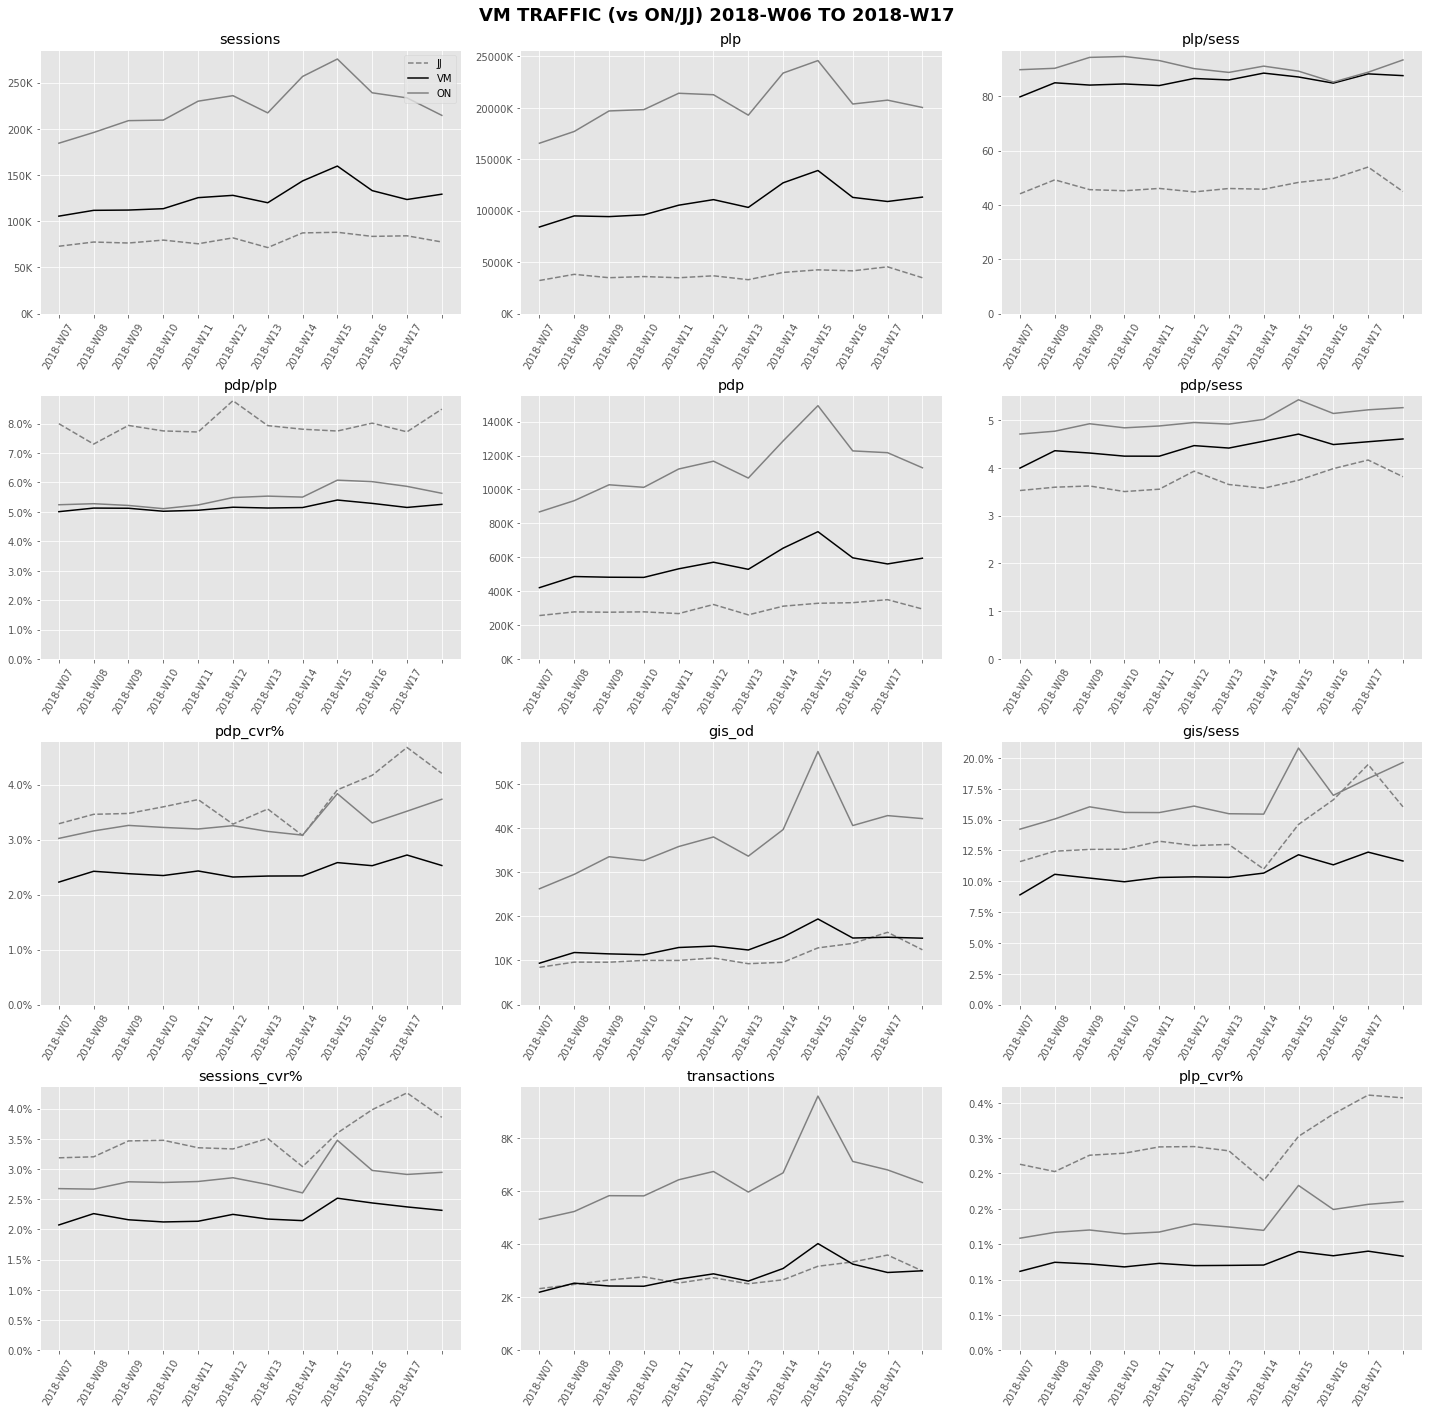

In [19]:
kpi_list = ['sessions','plp','plp/sess','pdp/plp','pdp','pdp/sess','pdp_cvr%','gis_od','gis/sess','sessions_cvr%','transactions','plp_cvr%']

fig = plt.figure(figsize=(20,20))
for i, kpi in enumerate(kpi_list, 1):
    df_kpi = df_merged[kpi]
    df_kpi = df_kpi[df_kpi.index.isin(df_kpi.index[-12:])]
    sub = plt.subplot(4,3,i)
    if min(df_kpi.min()) > 1000:
        sub.axes.yaxis.set_major_formatter(format_m)
    elif min(df_kpi.min()) < 1:
        sub.axes.yaxis.set_major_formatter(format_p)
    x = df_kpi.index
    y1 = df_kpi['JJ']
    y2 = df_kpi['VM']
    y3 = df_kpi['ON']
    plt.plot(x, y1, label = 'JJ',color='grey',linestyle='--')
    plt.plot(x, y2, label = 'VM',color='black')
    plt.plot(x, y3, label = 'ON',color='grey')
    plt.xticks(np.arange(0,len(df_kpi),1),list(df_kpi.index[np.arange(1,len(df_kpi),1)]),rotation=60)
    plt.ylim(0)
    if i == 1:
        plt.legend(loc=1)
    plt.title(kpi)
    plt.tight_layout()
title = min(df_kpi.index)+' TO '+max(df_kpi.index)
fig.suptitle('VM TRAFFIC (vs ON/JJ) '+title,fontsize=18,fontweight='bold')
fig.subplots_adjust(top=0.95)
# plt.show()
plt.savefig(title+'.pdf', dpi=100)

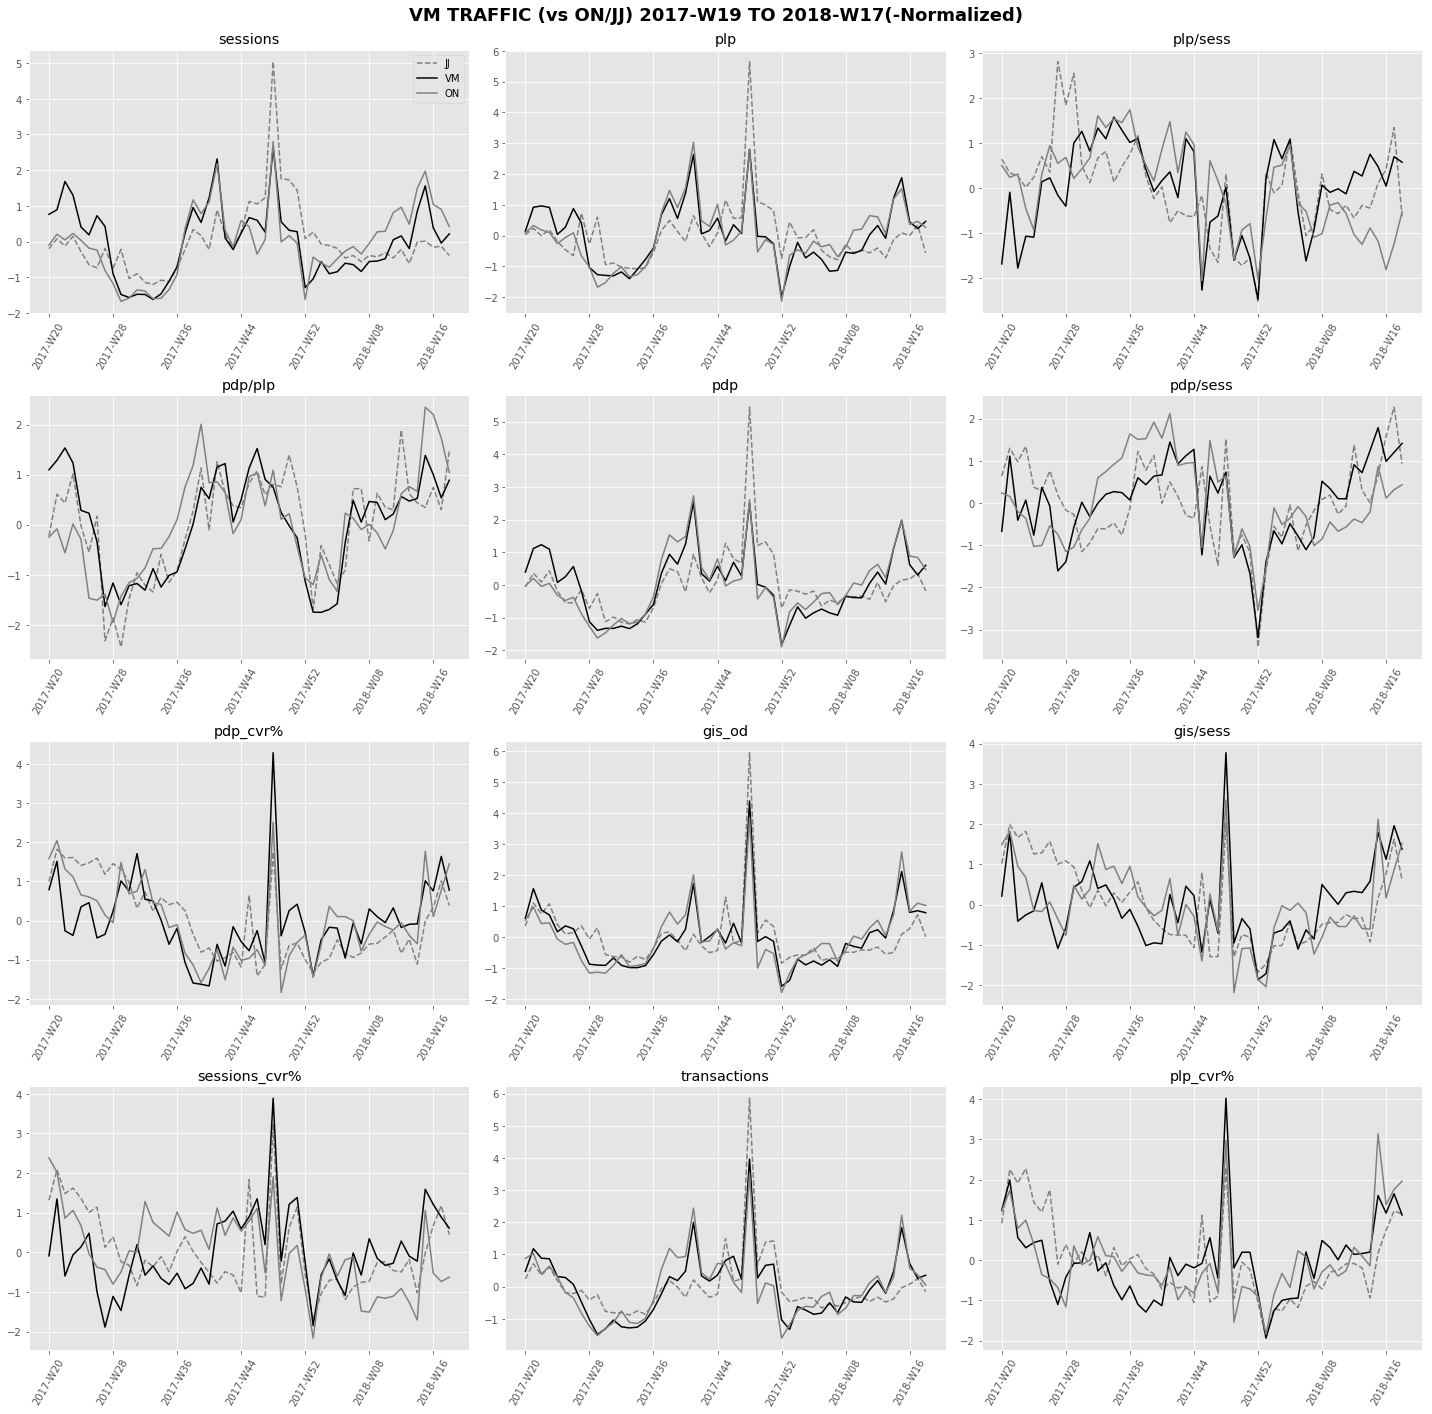

In [8]:
kpi_list = ['sessions','plp','plp/sess','pdp/plp','pdp','pdp/sess','pdp_cvr%','gis_od','gis/sess','sessions_cvr%','transactions','plp_cvr%']
fig = plt.figure(figsize=(20,20))
for i, kpi in enumerate(kpi_list, 1):
    df_kpi = normalize(df_merged[kpi])
    sub = plt.subplot(4,3,i)
    x = df_kpi.index
    y1 = df_kpi['JJ']
    y2 = df_kpi['VM']
    y3 = df_kpi['ON']
    plt.plot(x, y1, label = 'JJ',color='grey', linestyle='--')
    plt.plot(x, y2, label = 'VM',color='black')
    plt.plot(x, y3, label = 'ON',color='grey')
    plt.xticks(np.arange(0,len(df_kpi),8),list(df_kpi.index[np.arange(1,len(df_kpi),8)]),rotation=60)
    if i == 1:
        plt.legend(loc=1)
    plt.title(kpi)
    plt.tight_layout()
title = min(df_kpi.index)+' TO '+max(df_kpi.index) + '(-Normalized)'
fig.suptitle('VM TRAFFIC (vs ON/JJ) '+ title,fontsize=18,fontweight='bold')
fig.subplots_adjust(top=0.95)
# plt.show()
plt.savefig(title+'.pdf', dpi=100)